In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Mount your drive here by authorizing access
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df_model = pd.read_csv('/content/drive/Shared drives/STATS_507_Fianl_Project/NYPD_Crime/model_dataset.csv')
df_model

,index,num_crimes,year,month,nta_index,NTACode,avg6mon,PopE,MaleP,FemP,hispanicP,whiteP,blackP,asiaP,PopUnder15P,Pop15to34P,Pop35to54P,Pop55to74P,PopOver75P,otherRaceP,employedP,unemployedP,midincome,not_insP,povfamilyP,povchildP,pov65P
0,2013_BK09-1,62,2013,1,2013_BK09,BK09,77.333333,23945.0,49.4,50.6,7.8,76.2,4.9,6.7,12.1,34.1,29.9,17.8,6.2,4.5,65.8,4.7,105126.0,6.4,2.8,4.9,8.8
1,2013_BK09-2,72,2013,2,2013_BK09,BK09,75.166667,23945.0,49.4,50.6,7.8,76.2,4.9,6.7,12.1,34.1,29.9,17.8,6.2,4.5,65.8,4.7,105126.0,6.4,2.8,4.9,8.8
2,2013_BK09-3,67,2013,3,2013_BK09,BK09,71.833333,23945.0,49.4,50.6,7.8,76.2,4.9,6.7,12.1,34.1,29.9,17.8,6.2,4.5,65.8,4.7,105126.0,6.4,2.8,4.9,8.8
3,2013_BK09-4,72,2013,4,2013_BK09,BK09,69.833333,23945.0,49.4,50.6,7.8,76.2,4.9,6.7,12.1,34.1,29.9,17.8,6.2,4.5,65.8,4.7,105126.0,6.4,2.8,4.9,8.8
4,2013_BK09-5,69,2013,5,2013_BK09,BK09,67.500000,23945.0,49.4,50.6,7.8,76.2,4.9,6.7,12.1,34.1,29.9,17.8,6.2,4.5,65.8,4.7,105126.0,6.4,2.8,4.9,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11275,2017_SI54-8,90,2017,8,2017_SI54,SI54,79.333333,42721.0,47.7,52.3,10.3,82.9,0.8,5.4,16.0,24.6,28.3,24.3,6.8,0.7,57.0,3.7,93460.0,4.1,5.9,9.3,9.4
11276,2017_SI54-9,91,2017,9,2017_SI54,SI54,84.333333,42721.0,47.7,52.3,10.3,82.9,0.8,5.4,16.0,24.6,28.3,24.3,6.8,0.7,57.0,3.7,93460.0,4.1,5.9,9.3,9.4
11277,2017_SI54-10,111,2017,10,2017_SI54,SI54,85.166667,42721.0,47.7,52.3,10.3,82.9,0.8,5.4,16.0,24.6,28.3,24.3,6.8,0.7,57.0,3.7,93460.0,4.1,5.9,9.3,9.4
11278,2017_SI54-11,103,2017,11,2017_SI54,SI54,91.333333,42721.0,47.7,52.3,10.3,82.9,0.8,5.4,16.0,24.6,28.3,24.3,6.8,0.7,57.0,3.7,93460.0,4.1,5.9,9.3,9.4


# Data Preparation

In [0]:
df_train = df_model[df_model['year'] < 2017]
df_test = df_model[df_model['year'] == 2017]

In [0]:
# Consider 2017 as the test set
# FemP is just a complement of MaleP, employedP is just a complement of unemployed
drop_var_model = ['nta_index','year','month','index','NTACode','employedP', 'FemP']
df_train = df_train.drop(columns=drop_var_model)
df_test = df_test.drop(columns=drop_var_model)

### Standardize Predictors

In [0]:
# Standardize Predictors
x_train = df_train.iloc[:,1:]
x_train_std = (x_train - x_train.mean()) / x_train.std()
# Standardize Predictors
x_test = df_test.iloc[:,1:]
x_test_std = (x_test - x_train.mean()) / x_train.std()

In [0]:
y_train = df_train['num_crimes']
y_test = df_test['num_crimes']

### Correlation 

In [0]:
from string import ascii_letters

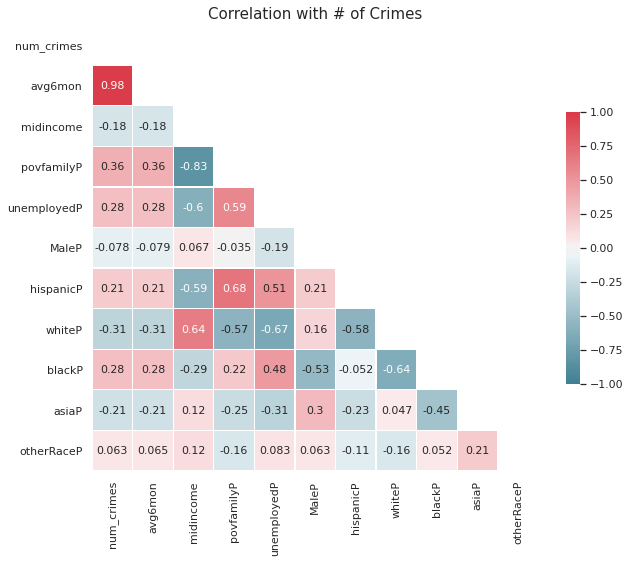

In [0]:
sns.set(style="white")
# Compute the correlation matrix
df_corr_race = df_train[['num_crimes','avg6mon','midincome','povfamilyP','unemployedP', 'MaleP', 'hispanicP', 'whiteP', 'blackP', 'asiaP','otherRaceP']]
corr_race = df_corr_race.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_race, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_race, mask=mask, cmap=cmap,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5},
            annot=True, annot_kws={"size": 11})
plt.title('Correlation with # of Crimes', fontsize=15)
plt.show()

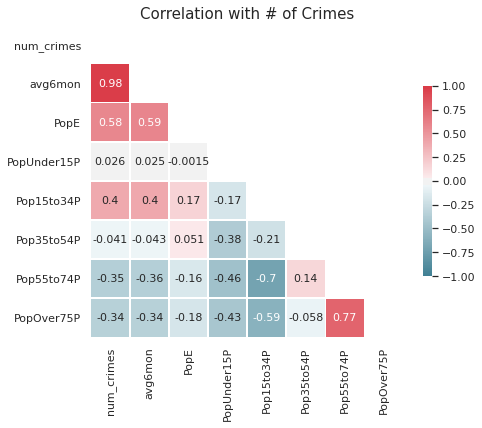

In [0]:
sns.set(style="white")
# Compute the correlation matrix
df_corr_race = df_train[['num_crimes','avg6mon','PopE','PopUnder15P', 'Pop15to34P', 'Pop35to54P', 'Pop55to74P','PopOver75P']]
corr_race = df_corr_race.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_race, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_race, mask=mask, cmap=cmap,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5},
            annot=True, annot_kws={"size": 11})
plt.title('Correlation with # of Crimes', fontsize=15)
plt.show()

## Fitting Linear Regression

In [0]:
from sklearn import linear_model

model = linear_model.LinearRegression(fit_intercept=True, normalize=False)
model.fit(x_train_std, y_train)
r2 = model.score(x_train_std, y_train)
print(r2)

0.9547106029144261


In [0]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train_std)))
print(rmse)

34.26075937833392


In [0]:
params = pd.Series(model.coef_, index=x_train_std.columns)
pd.DataFrame(params).reindex(params.abs().sort_values(ascending=False).index)

,0
avg6mon,153.459983
whiteP,-67.752288
blackP,-59.578594
hispanicP,-51.130483
asiaP,-35.208500
Pop15to34P,12.600250
PopUnder15P,8.652482
Pop55to74P,8.588074
Pop35to54P,6.196867
otherRaceP,-5.970503


## In sample prediction

In [0]:
Y1 = pd.DataFrame(y_train)
Y1['pred'] = model.predict(x_train_std)
Y1 = Y1.rename(columns={'num_crimes': 'true'})
Y1.reset_index(drop=True)

,true,pred
0,62,79.632185
1,72,77.555253
2,67,74.359973
3,72,72.442805
4,69,70.206110
...,...,...
9019,95,93.147613
9020,104,96.502657
9021,95,101.455341
9022,77,102.254161


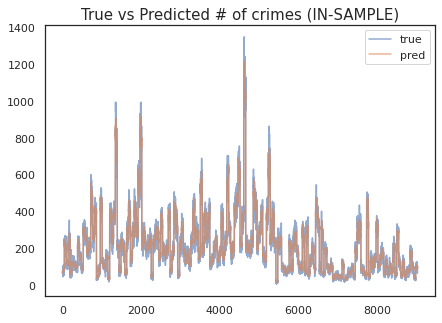

In [0]:
# Plot result
Y1.reset_index(drop=True).plot(alpha=0.6, figsize=(7,5))
plt.title('True vs Predicted # of crimes (IN-SAMPLE)', fontsize=15)
plt.show()

## Out of sample prediction

In [0]:
y_test.mean()

204.37367021276594

In [0]:
test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test_std)))
print(test_rmse)

29.94336440173598


In [0]:
Y_out_of_sample = pd.DataFrame(y_test)
Y_out_of_sample['pred'] = model.predict(x_test_std)
Y_out_of_sample = Y_out_of_sample.rename(columns={'num_crimes': 'true'})
Y_out_of_sample.reset_index(drop=True)

,true,pred
0,76,88.477631
1,61,86.081171
2,103,82.726127
3,72,83.205419
4,75,80.169903
...,...,...
2251,90,81.434784
2252,91,86.227704
2253,111,87.026524
2254,103,92.937792


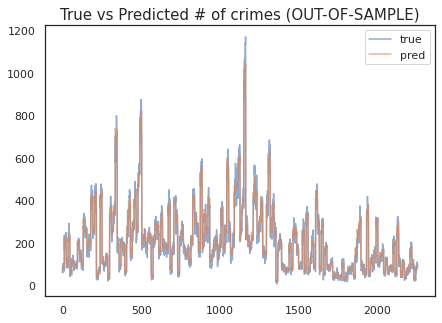

In [0]:
Y_out_of_sample.reset_index(drop=True).plot(alpha=0.6, figsize=(7,5))
plt.title('True vs Predicted # of crimes (OUT-OF-SAMPLE)', fontsize=15)
plt.show()

## Multicollinearity

For some variables, it seems that their coefficients have the opposite sign than what they should have. For example, from the results of our EDA, `hispanicP` and `blackP` will likely have positive effect on the number of crimes in an NTA. However in our model, the coefficients of these variables have negative sign.

In [0]:
pd.DataFrame(params)

,0
avg6mon,153.459983
PopE,2.950461
MaleP,0.316254
hispanicP,-51.130483
whiteP,-67.752288
blackP,-59.578594
asiaP,-35.208500
PopUnder15P,8.652482
Pop15to34P,12.600250
Pop35to54P,6.196867


We have many highly correlated variables

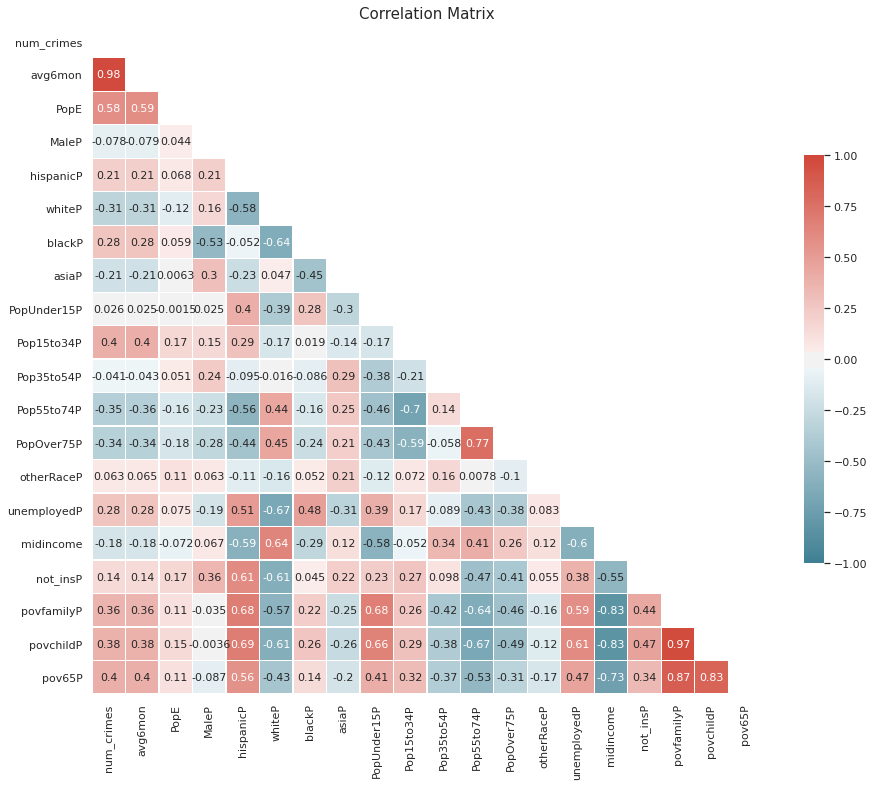

In [0]:
sns.set(style="white")
# Compute the correlation matrix
corr_mul = df_train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mul, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 15, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mul, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5},
            annot=True, annot_kws={"size": 11})
plt.title('Correlation Matrix', fontsize=15)
plt.show()

## Lasso

To deal with multicollinearlity, we try to fit LASSO

In [0]:
model_lasso = linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True,
                                         max_iter=1000, tol=0.0001, warm_start=False, positive=False,
                                         random_state=123, selection="random")
model_lasso.fit(x_train_std, y_train)
r2_lasso = model_lasso.score(x_train_std, y_train)
print(r2_lasso)

0.9545079310118684


In [0]:
rmse_lasso = np.sqrt(mean_squared_error(y_train, model_lasso.predict(x_train_std)))
print(rmse_lasso)

34.3373329555744


In [0]:
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, model_lasso.predict(x_test_std)))
print(test_rmse_lasso)

29.99242016527507


Most of coefficients now becomes 0

In [0]:
params_lasso = pd.Series(model_lasso.coef_, index=x_train_std.columns)
pd.DataFrame(params_lasso).reindex(params_lasso.abs().sort_values(ascending=False).index)

,0
avg6mon,154.819088
PopE,1.634166
pov65P,0.500825
Pop15to34P,0.291434
unemployedP,0.229736
povchildP,0.192818
blackP,0.098026
whiteP,-0.060851
not_insP,0.000000
midincome,-0.000000
